# Acquire and Prep - Wrangle

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from env import host, user, password

from sklearn.model_selection import train_test_split


In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
# function to query database and return zillow df
def get_data_from_sql():
    query = """
    SELECT bedroomcnt as bedrooms, bathroomcnt as bathrooms, calculatedfinishedsquarefeet as square_feet, 
    taxvaluedollarcnt FROM properties_2017
    JOIN predictions_2017 as p USING(parcelid)
    WHERE transactiondate < '2018-01-01' AND propertylandusetypeid LIKE '261'
    """
    df = pd.read_sql(query, get_connection('zillow'))
    return df

In [4]:
df = get_data_from_sql()

In [5]:
df.head()

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
0,4.0,3.5,3100.0,1023282.0
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
4,4.0,3.0,2962.0,773303.0


In [6]:
df.shape


(52441, 4)

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
bedrooms,52441.0,3.300681,0.949094,0.0,3.0,3.0,4.00,14.0
bathrooms,52441.0,2.299403,1.022772,0.0,2.0,2.0,3.00,18.0
square_feet,52359.0,1922.890754,1004.365838,128.0,1268.0,1659.0,2306.00,21929.0
taxvaluedollarcnt,52440.0,529688.163921,751894.553363,1000.0,193747.5,373612.0,619301.25,49061236.0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           52441 non-null  float64
 1   bathrooms          52441 non-null  float64
 2   square_feet        52359 non-null  float64
 3   taxvaluedollarcnt  52440 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


In [9]:
df.value_counts()

bedrooms  bathrooms  square_feet  taxvaluedollarcnt
3.0       2.5        1689.0       632000.0             3
2.0       1.5        1080.0       137444.0             3
3.0       2.0        1541.0       255000.0             3
2.0       1.5        1350.0       467000.0             3
          1.0        832.0        455000.0             3
                                                      ..
3.0       2.0        1328.0       521062.0             1
                     1329.0       87354.0              1
                                  124876.0             1
                                  160579.0             1
14.0      18.0       18654.0      49061236.0           1
Length: 52145, dtype: int64

# Prepare the Data

In [10]:
# Find columns with missing values and the total of missing values.

missing = df.isnull().sum()
missing[missing > 0]

square_feet          82
taxvaluedollarcnt     1
dtype: int64

In [11]:
# There are no columns present with missing values
missing.head()

bedrooms              0
bathrooms             0
square_feet          82
taxvaluedollarcnt     1
dtype: int64

In [12]:
# Find the total number of Null values in each column of our DataFrame.

df.isnull().sum()

bedrooms              0
bathrooms             0
square_feet          82
taxvaluedollarcnt     1
dtype: int64

In [13]:
# Check for any Null values in each column of our DataFrame.

df.isnull().any()


bedrooms             False
bathrooms            False
square_feet           True
taxvaluedollarcnt     True
dtype: bool

In [14]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]


Index(['square_feet', 'taxvaluedollarcnt'], dtype='object')

Finding Odd Values

Let's find the odd value in exam3 that is causing this numeric column to be coerced into an object data type.

In [15]:
df.bedrooms.value_counts(dropna=False, ascending=True)


14.0        1
11.0        1
10.0        2
12.0        3
9.0         8
8.0        24
7.0       106
0.0       137
1.0       612
6.0       635
5.0      3973
2.0      8340
4.0     15240
3.0     23359
Name: bedrooms, dtype: int64

In [16]:
# check value counts for bedrooms column

df['bedrooms'].value_counts(ascending=False)

3.0     23359
4.0     15240
2.0      8340
5.0      3973
6.0       635
1.0       612
0.0       137
7.0       106
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedrooms, dtype: int64

In [17]:
#check value counts for bathrooms column

df['bathrooms'].value_counts(ascending=True)


13.0        1
18.0        1
11.0        3
8.5         3
10.0        5
9.0        13
7.5        16
6.5        47
8.0        53
7.0        88
0.0       121
5.5       224
6.0       322
4.5       687
5.0       803
1.5       841
3.5       918
4.0      2227
2.5      3934
1.0      9568
3.0     10673
2.0     21893
Name: bathrooms, dtype: int64

In [18]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)

In [19]:
# Now .info() shows us that bedrooms has a Null value instead of a whitespace disguised as a non-null value.

df.isnull().any()

bedrooms             False
bathrooms            False
square_feet           True
taxvaluedollarcnt     True
dtype: bool

## Drop Null Values

In [20]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52358 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           52358 non-null  float64
 1   bathrooms          52358 non-null  float64
 2   square_feet        52358 non-null  float64
 3   taxvaluedollarcnt  52358 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


## Visualize Distributions

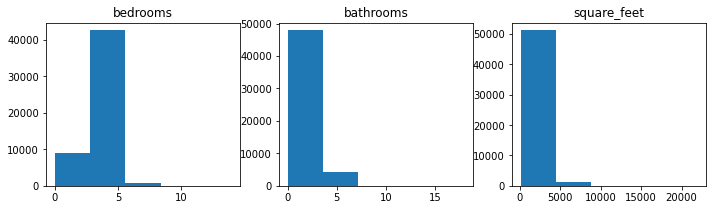

In [21]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'square_feet']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

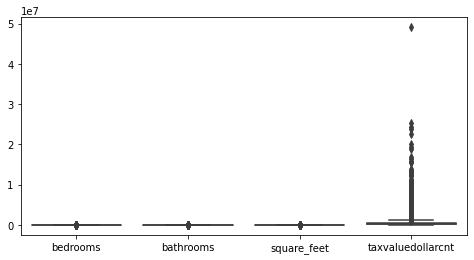

In [22]:
plt.figure(figsize=(8,4))

# Create boxplots for all but fips.
sns.boxplot(data=df)
plt.show()

## Create function for acquire and prep

In [23]:
#will update

def wrangle_zillow():
    '''
    Read student_grades csv file into a pandas DataFrame,
    drop student_id column, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned student grades DataFrame.
    '''
    # Acquire data from csv file.
    df = get_data_from_sql()
    
    # Replace white space values with NaN values.
    df = df.replace(r'^\s*$', np.nan, regex=True)

    # Drop all rows with NaN values.
    df = df[df.bathrooms != 0]
    df = df[df.bedrooms != 0]

    # clean data with split
    train, test = train_test_split(df, test_size = .2, random_state = 222)
    train, validate = train_test_split(train, test_size = .3, random_state = 222)
    
    return df

In [24]:
wrangle_zillow = wrangle_zillow()

In [25]:
wrangle_zillow.head()

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
0,4.0,3.5,3100.0,1023282.0
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
4,4.0,3.0,2962.0,773303.0


In [26]:
wrangle_zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52288 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           52288 non-null  float64
 1   bathrooms          52288 non-null  float64
 2   square_feet        52280 non-null  float64
 3   taxvaluedollarcnt  52287 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


In [27]:
wrangle_zillow.describe()

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
count,52288.000000,52288.000000,52280.000000,5.228700e+04
mean,3.309497,2.305108,1923.488944,5.281329e+05
std,0.935080,1.017882,1004.052334,7.482889e+05
min,1.000000,1.000000,152.000000,1.000000e+03
25%,3.000000,2.000000,1268.000000,1.939865e+05
50%,3.000000,2.000000,1659.000000,3.736120e+05
75%,4.000000,3.000000,2306.000000,6.186170e+05
max,14.000000,18.000000,21929.000000,4.906124e+07


In [28]:
wrangle_zillow.shape

(52288, 4)

In [29]:
## Split data

# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(wrangle_zillow, test_size = .2, random_state = 222)
train, validate = train_test_split(train, test_size = .3, random_state = 222)


In [30]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (29281, 4)
validate -> (12549, 4)
test -> (10458, 4)


In [31]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames
    return train, validate, test DataFrames.
    '''
    train, test = train_test_split(wrangle_zillow, test_size = .2, random_state = 222)
    train, validate = train_test_split(train, test_size = .3, random_state = 222)
    
    return train, validate, test

In [32]:
train, validate, test = split_data(wrangle_zillow)


In [33]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (29281, 4)
validate -> (12549, 4)
test -> (10458, 4)


In [34]:
train.head()

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
27302,3.0,2.0,1900.0,132841.0
16753,3.0,2.0,1479.0,243990.0
19790,5.0,2.0,1985.0,387825.0
16519,3.0,2.0,1384.0,85003.0
38667,3.0,3.0,2130.0,2030500.0


In [35]:
train.shape

(29281, 4)

In [37]:
wrangle_zillow.shape

(52288, 4)

In [39]:
wrangle_zillow.head()

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
0,4.0,3.5,3100.0,1023282.0
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
4,4.0,3.0,2962.0,773303.0


# Exploration

- What is the relationship between square feet and taxvaluedollarcount?
    - Is it a linear relationship or is there no relationship?
    
- What is the relationship between bedroom count and taxvaluedollarcount?

- What is the relationship between bathroom count and taxvaluedollarcount?

- What is the relationship between bedroom 



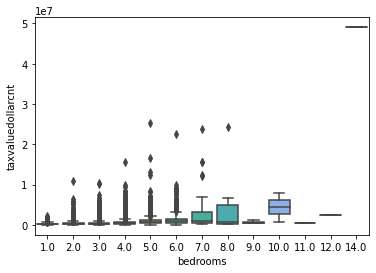

In [46]:
sns.boxplot(x="bedrooms", y="taxvaluedollarcnt", data=train)
plt.show()

In [48]:
def plot_variable_pairs(train):
    """
    Takes in a df and displays a PairGrid plot of all relationships,
    histogram and scatter plots.
    """
    g = sns.PairGrid(train)
    g.map_diag(plt.hist)
    g.map_offdiag(sns.regplot)
    
    plt.show()

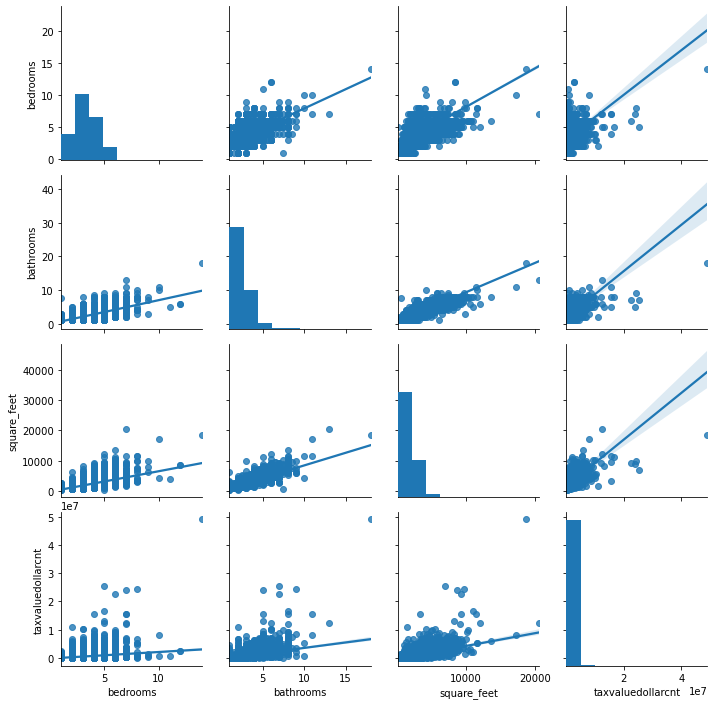

In [49]:
plot_variable_pairs(train)

In [62]:
def plot_categorical_and_continuous_vars(train):
    """
    Takes in dataframe and the name of the columns that hold the continuous and categorical features
    and outputs 3 different plots for visualizing a categorical variable and a continuous variable"
    """
    sns.relplot(x="bedrooms", y="taxvaluedollarcnt", data=train)
    plt.show()
    
    sns.lmplot(x="bathrooms", y="taxvaluedollarcnt", data=train, line_kws={'color': 'red'})
    plt.show()
    
    sns.jointplot(x="square_feet", y="taxvaluedollarcnt", data=train,  kind='reg', height=5)
    plt.show()
    return train

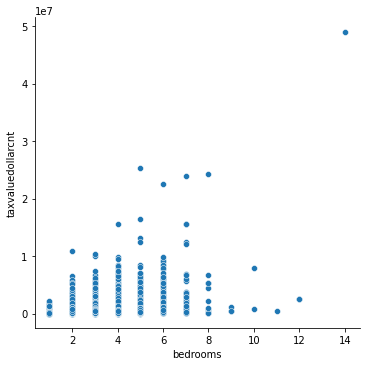

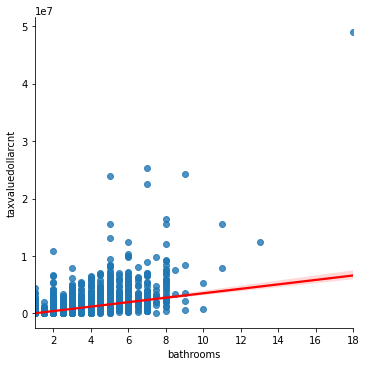

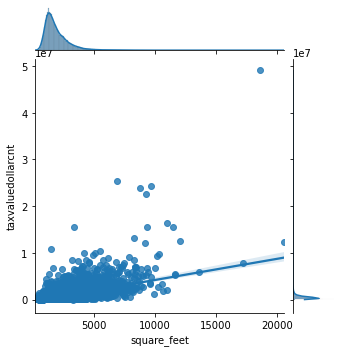

,bedrooms,bathrooms,square_feet,taxvaluedollarcnt
27302,3.0,2.0,1900.0,132841.0
16753,3.0,2.0,1479.0,243990.0
19790,5.0,2.0,1985.0,387825.0
16519,3.0,2.0,1384.0,85003.0
38667,3.0,3.0,2130.0,2030500.0
...,...,...,...,...
13644,4.0,3.0,1737.0,170075.0
22919,3.0,2.5,1702.0,618794.0
31732,4.0,2.0,2190.0,544375.0
45853,3.0,2.0,2053.0,387645.0


In [63]:
zplot = plot_categorical_and_continuous_vars(train)
zplot

In [69]:
def plot_variable_pairs(train):
    """
    Takes:
          df
    Returns:
          PairGrid plot of all relationships
          histogram and scatter plots
    """
    g = sns.PairGrid(df)
    g.map_diag(plt.hist)
    g.map_offdiag(sns.regplot)
    plt.show()

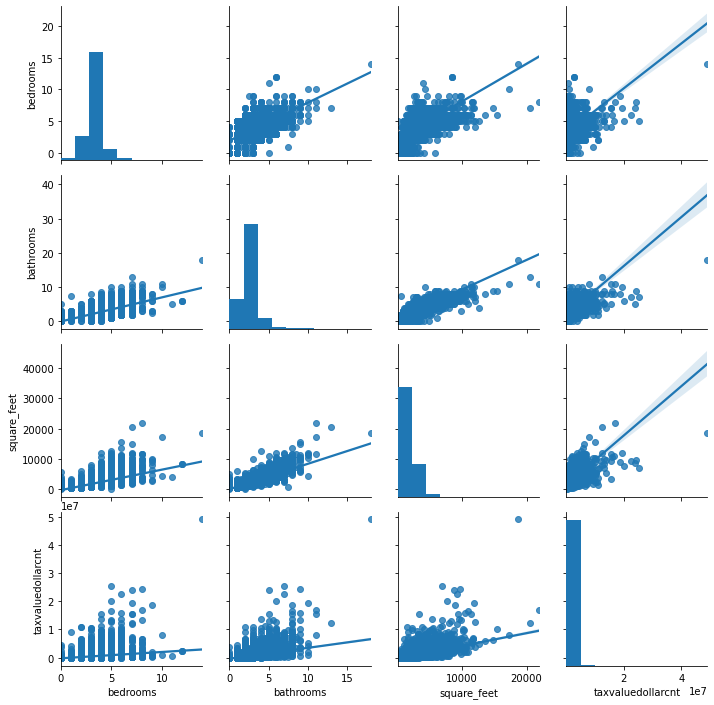

In [70]:
plot_variable_pairs(train)